# <FONT COLOR='red'>**_OVERALL DESCRIPTION_**</FONT>

---
---

The purpose of this notebook is to perform model building with the XGBoost algorithm so that it can correctly classify elephant and mouse flows from DCN traffic traces using a modified UNI1 data set. called UNIV1.

## <FONT COLOR = 'gray'>**INSTALL LIBRARIES**</FONT>

---

Next, we need install some libraries to use the model.

1. `pip install xgboost`: The command allows you to install the `xgboost` library which is an efficient and flexible implementation of the Gradient Boosting algorithm used in regression and classification tasks.

In [2]:
%%capture
pip install xgboost

## <FONT COLOR = 'gray'>**IMPORT MODEL LIBRARIES**</FONT>

---

Next, we need import some libraries to use the model.

1. `import xgboost as xgb`: An efficient and flexible Gradient Boosting library for classification and regression tasks. This implementation is very popular due to its high performance and ability to handle large and complex data.
2. `from sklearn.model_selection import train_test_split`: It corresponds to a scikit-learn function used to split a data set into two subsets: one for training and one for testing. This feature is essential for evaluating the performance of a model objectively, ensuring that it is trained on one data set and evaluated on a separate set.
3. `from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix`: By importing `accuracy_score` you access the function that calculates the accuracy (Proportion of correct predictions over the total predictions made); when `precision_score` is imported, the function that calculates the precision (Proportion of TP over total predicted positives[TP+FP]) is accessed; when you import `f1_score`, you access the function that calculates the F1 score, which is the harmonic mean of precision and recall. Finally by importing `confusion_matrix` you can generate a confusion matrix showing the number of true positives, false positives, true negatives and false negatives.

## <FONT COLOR = 'gray'>**IMPORT GRAPHIC LIBRARIES**</FONT>

---

Next, we need import some libraries to create graphics.
1. `import matplotlib.pyplot as plt`: Python plotting library, `pyplot` is a module of `matplotlib` that provides a MATLAB-like interface for creating plots. It allows you to create a wide variety of graphs such as line, bar, scatter, histograms, among others. Generally renamed to `plt` for ease of use in code.
2. `import seaborn as sns`: It allows the visualization of statistical data in a more attractive way; the library is characterized by allowing an easy creation of the same. It is usually renamed with `sns` to improve its usability in the code.

## <FONT COLOR = 'gray'>**IMPORT DATA ANALYSIS LIBRARIES**</FONT>

---

Next, we need import some libraries to data analysis graphics.
5. `import pandas as pd`: An essential component for data analysis and manipulation in Python, it provides data structures such as Series (one-dimensional) and DataFrames (two-dimensional) that allow you to handle tabular data with ease.
6. `import numpy as np`:Fundamental component for numerical computation in Python, as it provides support for multidimensional arrays and matrices, as well as a large collection of mathematical functions to operate on these arrays.

In [3]:
# IMPORT MODEL LIBRARIES
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# IMPORT GRHAPIC LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA ANALYSIS LIBRARIES
import pandas as pd
import numpy as np

## <FONT COLOR = 'orange'>**LOAD DATASET**</FONT>

---

We will use the UNIV1 dataset which is a modification of the UNI1 dataset, which contains traffic traces from several DCNs collected by a university in 2010. The traffic traces in the dataset are only IPv4.

UNIV1 contain the follow structure:

1. `start_time`: Represent the beginning of the capture per flow.
2. `end_time`: Represent the finish of the capture per flow.
3. `ip_src`: Represent the source IPv4.
4. `ip_dst`: Represent the destination IPv4.
5. `ip_proto`: Represent the IP protocol used.
6. `port_src`: Represent the source port.
7. `port_dst`: Represent the destination port.
8. `size_pkt1`: Represent the size of the packet 1.
9. `size_pkt2`: Represent the size of the packet 2.
10. `size_pkt3`: Represent the size of the packet 3.
11. `size_pkt4`: Represent the size of the packet 4.
12. `size_pkt5`: Represent the size of the packet 5.
13. `size_pkt6`: Represent the size of the packet 6.
14. `size_pkt7`: Represent the size of the packet 7.
15. `iat_pkt2`: Represent the inter arrive time of the packet 2.
16. `iat_pkt3`: Represent the inter arrive time of the packet 3.
17. `iat_pkt4`: Represent the inter arrive time of the packet 4.
18. `iat_pkt5`: Represent the inter arrive time of the packet 5.
19. `iat_pkt6`: Represent the inter arrive time of the packet 6.
20. `iat_pkt7`: Represent the inter arrive time of the packet 7.
21. `tot_size`: Represent the total size per flow.
22. `flow_type`: Represent the flow type as elephant or mice.

In [4]:
# UNIV1 DATASET ID
id = '1wy6vUo7KJfVsROdoILF8LD6ZfoLcT0kh'

# GENERATE THE DOWNLOAD URL
url_univ1 = f'https://drive.google.com/uc?id={id}'

# DOWNLOAD AND LOAD UNI1 DATASET IN A DATAFRAME OF PANDAS
univ1_df = pd.read_csv(url_univ1)
univ1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73256 entries, 0 to 73255
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_time  73256 non-null  int64  
 1   end_time    73256 non-null  int64  
 2   ip_src      73256 non-null  object 
 3   ip_dst      73256 non-null  object 
 4   ip_proto    73256 non-null  int64  
 5   port_src    73256 non-null  int64  
 6   port_dst    73256 non-null  int64  
 7   size_pkt1   73256 non-null  int64  
 8   size_pkt2   73256 non-null  float64
 9   size_pkt3   73256 non-null  float64
 10  size_pkt4   73256 non-null  float64
 11  size_pkt5   73256 non-null  float64
 12  size_pkt6   73256 non-null  float64
 13  size_pkt7   73256 non-null  float64
 14  iat_pkt2    73256 non-null  float64
 15  iat_pkt3    73256 non-null  float64
 16  iat_pkt4    73256 non-null  float64
 17  iat_pkt5    73256 non-null  float64
 18  iat_pkt6    73256 non-null  float64
 19  iat_pkt7    73256 non-nul

In [5]:
# PRESENTATION OF AN EXAMPLE OF THE DATA
pd.set_option('display.max_columns', None)
display(univ1_df.head())

,start_time,end_time,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size,flow_type
0,1261067166249838,1261067166272053,41.177.26.55,244.3.160.248,6,80,43521,66,64.0,275.0,1518.0,1518.0,1518.0,1518.0,616.0,6289.0,14258.0,22.0,20.0,58.0,10992.0,mice
1,1261067165656630,1261067171636653,41.177.26.15,164.247.105.218,6,80,1506,1518,1518.0,1518.0,1518.0,1518.0,950.0,1518.0,1121030.0,21.0,998925.0,21.0,31021.0,50.0,27138.0,elephant
2,1261067170895775,1261067171122094,41.177.98.176,41.177.194.186,6,80,1587,66,64.0,1518.0,1518.0,1518.0,1012.0,1518.0,8299.0,207090.0,121.0,125.0,1971.0,410.0,22521.0,mice
3,1261067173048827,1261067173202738,41.177.26.55,244.3.160.248,6,80,43584,66,64.0,1518.0,1518.0,1518.0,1518.0,1518.0,727.0,151600.0,21.0,19.0,744.0,20.0,14904.0,mice
4,1261067172050638,1261067172468947,41.177.26.15,68.157.168.224,6,80,62277,82,70.0,1518.0,1518.0,1518.0,1518.0,1518.0,43584.0,243392.0,21.0,34.0,43685.0,33.0,56918.0,elephant


## <FONT COLOR = 'orange'>**DATA CLEANING**</FONT>

---

For the creation of any type of ML (Machine Learning) model, it is necessary to perform data cleaning in order to, in this case, manipulate the records so that their data type is interpretable by the `XGBoost` algorithm, as well as, perform the replacing elephant with 1 and mice with 0 in the target prediction field.

In [6]:
# CONVERT OBJECT TYPE COLUMNS TO CATEGORY IN THE DATAFRAME
for col in ['ip_src', 'ip_dst', 'flow_type']:
    univ1_df[col] = univ1_df[col].astype('category')
univ1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73256 entries, 0 to 73255
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   start_time  73256 non-null  int64   
 1   end_time    73256 non-null  int64   
 2   ip_src      73256 non-null  category
 3   ip_dst      73256 non-null  category
 4   ip_proto    73256 non-null  int64   
 5   port_src    73256 non-null  int64   
 6   port_dst    73256 non-null  int64   
 7   size_pkt1   73256 non-null  int64   
 8   size_pkt2   73256 non-null  float64 
 9   size_pkt3   73256 non-null  float64 
 10  size_pkt4   73256 non-null  float64 
 11  size_pkt5   73256 non-null  float64 
 12  size_pkt6   73256 non-null  float64 
 13  size_pkt7   73256 non-null  float64 
 14  iat_pkt2    73256 non-null  float64 
 15  iat_pkt3    73256 non-null  float64 
 16  iat_pkt4    73256 non-null  float64 
 17  iat_pkt5    73256 non-null  float64 
 18  iat_pkt6    73256 non-null  float64 
 19  iat_

In [7]:
# CONVERT UNIQUE FLOW_TYPE VALUES THAT ARE CATEGORICAL TO NUMERIC
print(f'Unique values of flow_type: {univ1_df["flow_type"].unique()}')
print(f'mice: 0\nelephant: 1\n')
univ1_df['flow_type'] = univ1_df['flow_type'].map({'mice': 0, 'elephant': 1})
print(f'New unique values of flow_type: {univ1_df["flow_type"].unique()}\n')
display(univ1_df.info())

Unique values of flow_type: ['mice', 'elephant']
Categories (2, object): ['elephant', 'mice']
mice: 0
elephant: 1

New unique values of flow_type: [0, 1]
Categories (2, int64): [1, 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73256 entries, 0 to 73255
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   start_time  73256 non-null  int64   
 1   end_time    73256 non-null  int64   
 2   ip_src      73256 non-null  category
 3   ip_dst      73256 non-null  category
 4   ip_proto    73256 non-null  int64   
 5   port_src    73256 non-null  int64   
 6   port_dst    73256 non-null  int64   
 7   size_pkt1   73256 non-null  int64   
 8   size_pkt2   73256 non-null  float64 
 9   size_pkt3   73256 non-null  float64 
 10  size_pkt4   73256 non-null  float64 
 11  size_pkt5   73256 non-null  float64 
 12  size_pkt6   73256 non-null  float64 
 13  size_pkt7   73256 non-null  float64 
 14  iat_pkt2    73256 non-null  f

None

In [8]:
# SPLIT THE DATA IN TWO SETS BASE_DATA AND EVALUATION_DATA
seed = 42
base_data, evaluation_data = train_test_split(univ1_df, test_size=0.1, stratify=univ1_df['flow_type'], random_state=seed)

# REVIEW THE DISTRIBUTION OF TAG DATA
print(
  f'''\n\nClass distribution between base_data and evaluation_data.
  \nBase set class distribution: {base_data["flow_type"].value_counts(normalize=True)}.
  \nEvaluation set class distribution: {evaluation_data["flow_type"].value_counts(normalize=True)}\n\n.'''
)
display(base_data.info())
print('\n')
display(evaluation_data.info())



Class distribution between base_data and evaluation_data.
  
Base set class distribution: flow_type
0    0.648855
1    0.351145
Name: proportion, dtype: float64.
  
Evaluation set class distribution: flow_type
0    0.648785
1    0.351215
Name: proportion, dtype: float64

.
<class 'pandas.core.frame.DataFrame'>
Index: 65930 entries, 71296 to 56665
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   start_time  65930 non-null  int64   
 1   end_time    65930 non-null  int64   
 2   ip_src      65930 non-null  category
 3   ip_dst      65930 non-null  category
 4   ip_proto    65930 non-null  int64   
 5   port_src    65930 non-null  int64   
 6   port_dst    65930 non-null  int64   
 7   size_pkt1   65930 non-null  int64   
 8   size_pkt2   65930 non-null  float64 
 9   size_pkt3   65930 non-null  float64 
 10  size_pkt4   65930 non-null  float64 
 11  size_pkt5   65930 non-null  float64 
 12  size_pkt6   65930 non-n

None



<class 'pandas.core.frame.DataFrame'>
Index: 7326 entries, 57387 to 48802
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   start_time  7326 non-null   int64   
 1   end_time    7326 non-null   int64   
 2   ip_src      7326 non-null   category
 3   ip_dst      7326 non-null   category
 4   ip_proto    7326 non-null   int64   
 5   port_src    7326 non-null   int64   
 6   port_dst    7326 non-null   int64   
 7   size_pkt1   7326 non-null   int64   
 8   size_pkt2   7326 non-null   float64 
 9   size_pkt3   7326 non-null   float64 
 10  size_pkt4   7326 non-null   float64 
 11  size_pkt5   7326 non-null   float64 
 12  size_pkt6   7326 non-null   float64 
 13  size_pkt7   7326 non-null   float64 
 14  iat_pkt2    7326 non-null   float64 
 15  iat_pkt3    7326 non-null   float64 
 16  iat_pkt4    7326 non-null   float64 
 17  iat_pkt5    7326 non-null   float64 
 18  iat_pkt6    7326 non-null   float64 
 19  iat_

None

In [9]:
# SPLIT THE DATA IN TWO SETS TRAIN AND TEST
train, test = train_test_split(base_data, test_size=0.3, stratify=base_data['flow_type'], random_state=seed)

# SPLIT THE DATA IN TWO SETS BASE_DATA AND EVALUATION_DATA
print(
  f'''\n\nClass distribution between train and test.
  \nTrain set class distribution: {train["flow_type"].value_counts(normalize=True)}.
  \nTest set class distribution: {test["flow_type"].value_counts(normalize=True)}.'''
)
display(train.info())
print('\n')
display(test.info())



Class distribution between train and test.
  
Train set class distribution: flow_type
0    0.648848
1    0.351152
Name: proportion, dtype: float64.
  
Test set class distribution: flow_type
0    0.64887
1    0.35113
Name: proportion, dtype: float64.
<class 'pandas.core.frame.DataFrame'>
Index: 46151 entries, 36208 to 39292
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   start_time  46151 non-null  int64   
 1   end_time    46151 non-null  int64   
 2   ip_src      46151 non-null  category
 3   ip_dst      46151 non-null  category
 4   ip_proto    46151 non-null  int64   
 5   port_src    46151 non-null  int64   
 6   port_dst    46151 non-null  int64   
 7   size_pkt1   46151 non-null  int64   
 8   size_pkt2   46151 non-null  float64 
 9   size_pkt3   46151 non-null  float64 
 10  size_pkt4   46151 non-null  float64 
 11  size_pkt5   46151 non-null  float64 
 12  size_pkt6   46151 non-null  float64 
 13  size_

None



<class 'pandas.core.frame.DataFrame'>
Index: 19779 entries, 64457 to 20892
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   start_time  19779 non-null  int64   
 1   end_time    19779 non-null  int64   
 2   ip_src      19779 non-null  category
 3   ip_dst      19779 non-null  category
 4   ip_proto    19779 non-null  int64   
 5   port_src    19779 non-null  int64   
 6   port_dst    19779 non-null  int64   
 7   size_pkt1   19779 non-null  int64   
 8   size_pkt2   19779 non-null  float64 
 9   size_pkt3   19779 non-null  float64 
 10  size_pkt4   19779 non-null  float64 
 11  size_pkt5   19779 non-null  float64 
 12  size_pkt6   19779 non-null  float64 
 13  size_pkt7   19779 non-null  float64 
 14  iat_pkt2    19779 non-null  float64 
 15  iat_pkt3    19779 non-null  float64 
 16  iat_pkt4    19779 non-null  float64 
 17  iat_pkt5    19779 non-null  float64 
 18  iat_pkt6    19779 non-null  float64 
 19  iat

None

In [10]:
# SEPARATION OF TRAIN AND TEST DATASET DATA INTO CHARACTERISTICS AND LABELS
x_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
x_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

## <FONT COLOR = 'orange'>**TRAINING**</FONT>

---

Now is the time to create and train the model with the features of the training data set. The objective is to achieve a fully functional model in the task of binary flow classification that is capable of generalizing the patterns of the records without having to learn them by heart (Overfitting).

In [11]:
# CONFIGURATION OF THE MATRICES FOR THE XGBOOST
dtrain = xgb.DMatrix(data=x_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=x_test, label=y_test, enable_categorical=True)

In [12]:
# CONSTRUCT THE FIGURE TO THE CONFUSION MATRIX
def create_cm(conf, title):
  plt.imshow(conf, interpolation = "nearest")
  class_names = [0,1]
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # CREATE A HEATMAP IN TO THE CONFUSION MATRIX
  sns.heatmap(pd.DataFrame(conf), annot=True, cmap=plt.cm.Blues, fmt='g')
  plt.tight_layout()
  plt.title(title)
  plt.xlabel('Predict')
  plt.ylabel('Real')

  plt.tight_layout()
  plt.show()
  plt.close()

# DEFINE A CUSTOM COMPUTE_METRICS FUNCTION
def compute_metrics(y_test, y_pred):
  accu = accuracy_score(y_test, y_pred)
  pres = precision_score(y_test, y_pred)
  f1_s = f1_score(y_test, y_pred)
  conf = confusion_matrix(y_test, y_pred)
  # PRINT THE CONFUSION
  create_cm(conf,'Confusion Matrix')
  # RETURN METRICS
  return {
      'accuracy': accu,
      'precision': pres,
      'f1_score': f1_s
  }

In [13]:
# BEST PARAMETERS FOR XGBOOST TRAINING
params = {
    'eta': 0.01,
    'gamma': 10,
    'max_depth': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'lambda': 15,
    'alpha': 15,
    'grow_policy': 'lossguide',
    'random_state': seed
}

num_round = 300
bst = xgb.train(params, dtrain, num_round)

Now we proceed to test the results, the evaluation is carried out in a different environment to avoid problems with memory reading and therefore with the evaluation.

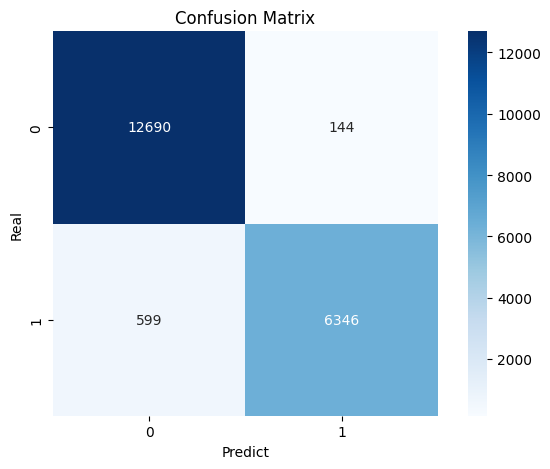

{'accuracy': 0.9624349057080742,
 'precision': 0.9778120184899846,
 'f1_score': 0.9446966877558616}

In [14]:
y_preds = bst.predict(dtest)
y_preds = [1 if p > 0.5 else 0 for p in y_preds]
compute_metrics(y_test, y_preds)